In [1]:
import pandas as pd 
import numpy as np
import joblib as jb
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
encode_model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian/model/ordinal_encode_model.pkl')
Model=jb.load('D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/trian/model/rf_train_model.pkl')

In [16]:
def flow(X_path):
    # read 
    data = pd.read_csv(X_path)
    # Outlier handling
    for column in ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']:
        q1 =  data[column].quantile(0.25)
        q3 =  data[column].quantile(0.75)
        IQR = q3 - q1
        lower_range = q1 - (1.5 * IQR)
        upper_range = q3 + (1.5 * IQR)
        # Capping 
        data[column] = np.where(data[column] < lower_range, lower_range,
                       np.where(data[column] > upper_range, upper_range,
                                data[column]))
    # Data split 
    df=data.copy()
    X = df.drop('Selling_Price', axis=1)
    Y_test = df['Selling_Price']

    # Encode
    ordinal_encode = encode_model.transform(X)
    ordinal_encode_df = pd.DataFrame(ordinal_encode, columns=X.columns)

    # Prediction
    y_pred = pd.DataFrame(Model.predict(ordinal_encode_df))
    y_pred = y_pred.rename(columns={0: 'Selling_Price'})

    # Metrics
    MSE = mean_squared_error(Y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(Y_test, y_pred)
    R2 = r2_score(Y_test, y_pred)

    return Y_test,y_pred, MSE, RMSE, MAE, R2




In [17]:
X_test_path = 'D:/DS NOTE/OASIS INFO BYTE/Car price prediction(used cars)/test/raw/test.csv'
Y_test,y_pred, MSE, RMSE, MAE, R2 = flow(X_test_path)

In [18]:
y_pred

,Selling_Price
0,3.814719
1,4.228213
2,3.629867
3,3.814472
4,4.075193
...,...
96,4.113373
97,6.519874
98,3.128466
99,5.862292


In [19]:
MSE

10.752756180960185

In [20]:
RMSE

3.279139548869518

In [21]:
MAE

1.9911146197877705

In [22]:
R2

-0.014186256101741401

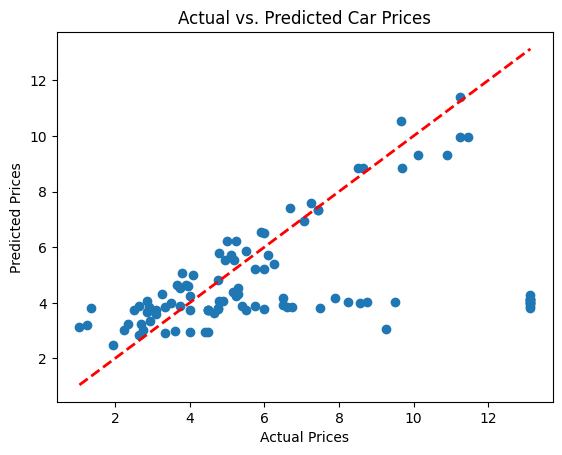

In [24]:
plt.scatter(Y_test, y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.title("Actual vs. Predicted Car Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()
